In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet169

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [9]:
#Dataset of images is organized via test and trainin folders where each has subfolders with benign and malignant skin moles
# Flow training images in batches of 120 using flow_from_directory
train_generator = train_datagen.flow_from_directory(
        'data/train/',  # source directory for training images
        classes = ['malignant', 'benign'],
        target_size=(200, 200),  # Resizing each image to 200x200
        color_mode='rgb',    
        batch_size=20,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'data/test/',  #source directory for training images
        classes = ['malignant', 'benign'],
        target_size=(200, 200),
        color_mode='rgb',
        batch_size=20,
        # Use binary labels
        class_mode='binary',
        shuffle=False)
test_generator= validation_datagen.flow_from_directory(
        'data/test2/',  #source directory for training images
        classes = ['malignant', 'benign'],
        target_size=(200, 200),
        color_mode='rgb',
        batch_size=1,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 2637 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [10]:
model = keras.Sequential([
    # Block One
    layers.Input([200, 200, 3]),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='softmax')
])

In [53]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
)

In [57]:
model.evaluate(validation_generator)

660/660 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1880 - loss: 0.7542


[0.689010739326477, 0.5454545617103577]

In [13]:
model_updated=keras.Sequential([
    #Pretrained Model
    layers.Input([200, 200, 3]),
    DenseNet169(weights = 'imagenet', input_shape = (200,200,3),include_top = False),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    #Block 1
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    #Block 2
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1,activation='sigmoid'),
])

51877672/51877672 [==============================] - 25s 0us/step


In [15]:
model_updated.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
history_updated = model_updated.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=8
)

Epoch 1/5
8/8 [==============================] - 76s 10s/step - loss: 0.5256 - accuracy: 0.7375 - val_loss: 3.6780 - val_accuracy: 0.5786
Epoch 2/5
8/8 [==============================] - 77s 10s/step - loss: 0.3289 - accuracy: 0.8625 - val_loss: 7.6236 - val_accuracy: 0.5786
Epoch 3/5
8/8 [==============================] - 78s 10s/step - loss: 0.5168 - accuracy: 0.8000 - val_loss: 19.1607 - val_accuracy: 0.5786
Epoch 4/5
8/8 [==============================] - 81s 11s/step - loss: 0.5688 - accuracy: 0.7312 - val_loss: 59.7023 - val_accuracy: 0.5786
Epoch 5/5
8/8 [==============================] - 80s 11s/step - loss: 0.4946 - accuracy: 0.7625 - val_loss: 238.4906 - val_accuracy: 0.5786


In [18]:
model_updated.evaluate(test_generator)


24/24 [==============================] - 2s 101ms/step - loss: 216.8624 - accuracy: 0.5833


[216.86244201660156, 0.5833333134651184]

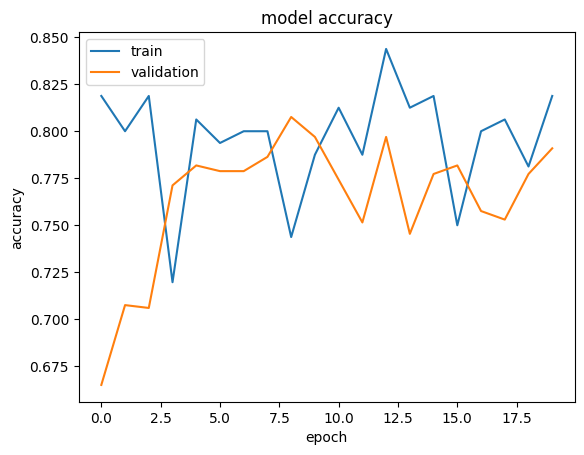

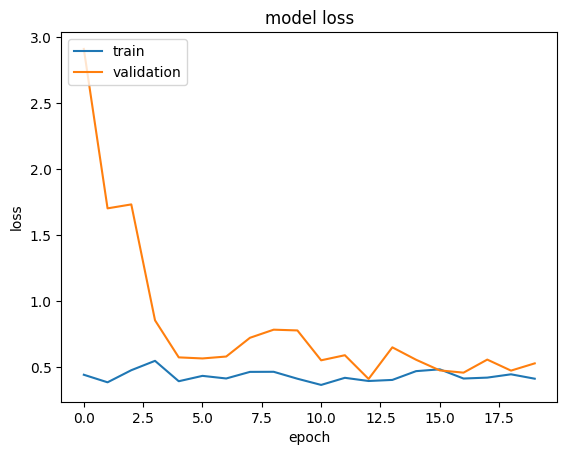

In [26]:
# summarize history for accuracy
plt.plot(history_updated.history['accuracy'])
plt.plot(history_updated.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_updated.history['loss'])
plt.plot(history_updated.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()